##**CREDIT CARD FRAUD DETECTION**

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


### Exploratory Data Analysis

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
#for scaling data
from sklearn.preprocessing import MinMaxScaler
#to split data into training and testing
from sklearn.model_selection import train_test_split

#to build classification model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#for handling imbalanced dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#to calculate model performance
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Project /creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


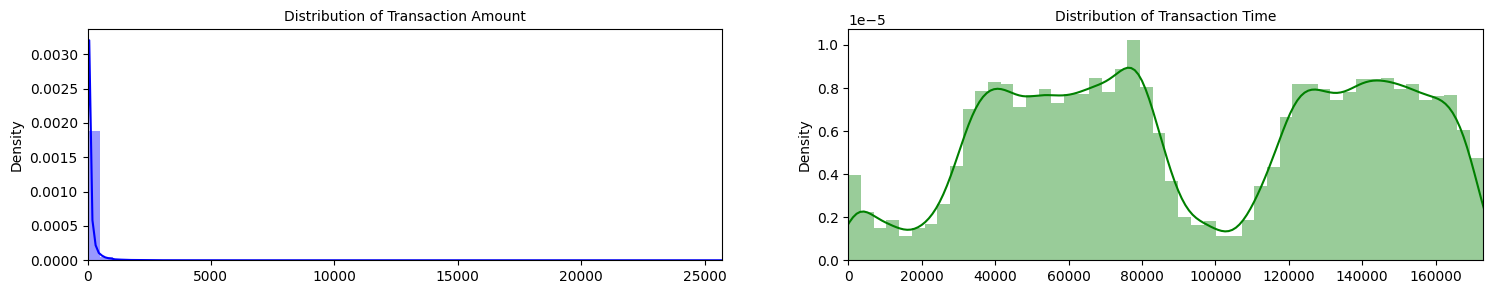

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,3))

amount=df['Amount'].values
time=df['Time'].values

sns.distplot(amount,ax=ax[0],color='b')
ax[0].set_title('Distribution of Transaction Amount',fontsize=10)
ax[0].set_xlim([min(amount),max(amount)])

sns.distplot(time,ax=ax[1],color='g')
ax[1].set_title('Distribution of Transaction Time',fontsize=10)
ax[1].set_xlim([min(time),max(time)])

plt.show()

In [ ]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [ ]:
X=df.iloc[:,:-1]
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
y=df.iloc[:,-1]
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
scaler=MinMaxScaler ()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.00000000e+00, 9.35192337e-01, 7.66490419e-01, ...,
        4.18976135e-01, 3.12696634e-01, 5.82379309e-03],
       [0.00000000e+00, 9.78541955e-01, 7.70066651e-01, ...,
        4.16345145e-01, 3.13422663e-01, 1.04705276e-04],
       [5.78730497e-06, 9.35217023e-01, 7.53117667e-01, ...,
        4.15489266e-01, 3.11911316e-01, 1.47389219e-02],
       ...,
       [9.99976851e-01, 9.90904812e-01, 7.64079694e-01, ...,
        4.16593177e-01, 3.12584864e-01, 2.64215395e-03],
       [9.99976851e-01, 9.54208999e-01, 7.72855742e-01, ...,
        4.18519535e-01, 3.15245157e-01, 3.89238944e-04],
       [1.00000000e+00, 9.49231759e-01, 7.65256401e-01, ...,
        4.16466371e-01, 3.13400843e-01, 8.44648509e-03]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [ ]:
print (X_train.shape,y_train.shape)
print (X_test.shape,y_test.shape)

(199364, 30) (199364,)
(85443, 30) (85443,)


In [ ]:
knn=KNeighborsClassifier ()
sv=SVC()
gnb=GaussianNB ()
dec=DecisionTreeClassifier (criterion='entropy')
rfc=RandomForestClassifier ()
adc=AdaBoostClassifier ()
models=[knn,sv,gnb,dec,rfc,adc]
for model in models:
    print ('******************************',model,'******************************')
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_new=model.predict(scaler.transform([[0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000]]))
    print ('predicted value:',y_new)
    print (classification_report(y_test,y_pred))

****************************** KNeighborsClassifier() ******************************
predicted value: [0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.91      0.68      0.78       135

    accuracy                           1.00     85443
   macro avg       0.96      0.84      0.89     85443
weighted avg       1.00      1.00      1.00     85443

****************************** SVC() ******************************
predicted value: [0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.81      0.76      0.79       135

    accuracy                           1.00     85443
   macro avg       0.91      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443

****************************** GaussianNB() ******************************
predicted value: [0]
              precision    recall  f1-score   support



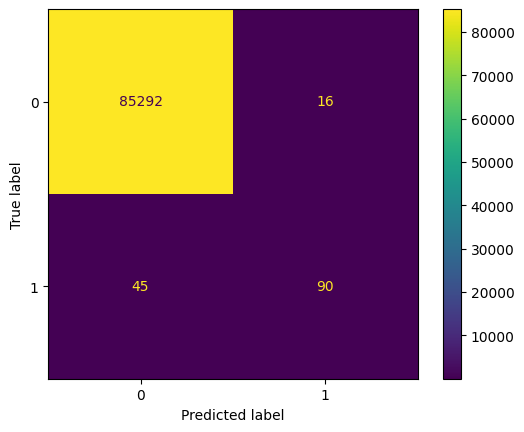

In [ ]:
print (ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'CLASS DISTRIBUTION \n (0: No Fraud || 1: Fraud)')

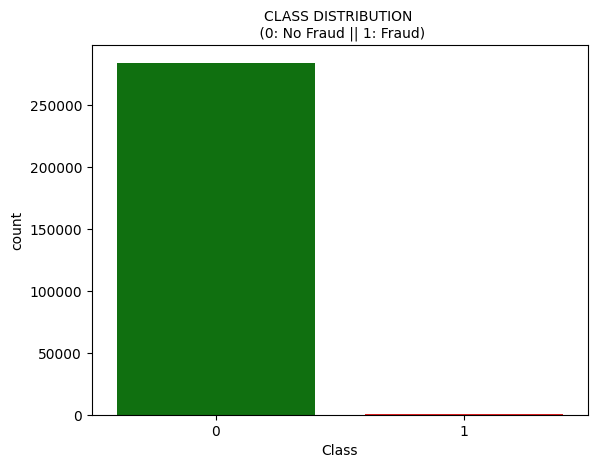

In [ ]:
color=['g','r']
sns.countplot(x='Class',data=df,palette=color)
plt.title('CLASS DISTRIBUTION \n (0: No Fraud || 1: Fraud)',fontsize=10)

--This dataset have imbalanced data--

To handle this imbalanced dataset we use:-


•oversampling technique

•undersampling technique

###**oversampling**

In [ ]:
os=SMOTE()
X_os,y_os=os.fit_resample(X,y)

In [ ]:
y_os.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

Text(0.5, 1.0, 'CLASS DISTRIBUTION WITH OVERSAMPLING \n (0: No Fraud || 1: Fraud)')

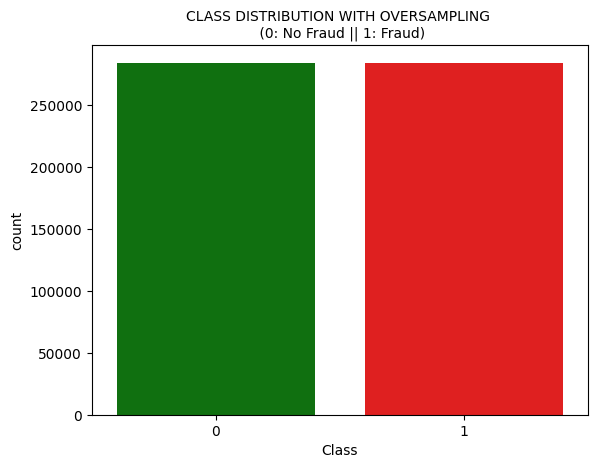

In [ ]:
color=['g','r']
sns.countplot(x=y_os,data=df,palette=color)
plt.title('CLASS DISTRIBUTION WITH OVERSAMPLING \n (0: No Fraud || 1: Fraud)',fontsize=10)

In [ ]:
X_os

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,74324.847247,-2.102163,2.253256,-2.661937,0.108322,-2.549760,-0.885463,-0.071982,-0.387117,0.119841,...,-0.456275,0.234311,-0.445163,0.253998,0.243603,-1.137757,-1.073118,-0.582759,0.299679,288.363171
568626,53040.636023,0.439515,1.179669,-0.779922,3.516254,-1.266802,-0.221740,-2.279477,0.631783,-0.945718,...,0.269890,0.344721,0.223959,-0.186074,0.201673,0.706075,0.089060,0.500984,0.255824,0.849936
568627,41915.094280,-14.817106,7.424571,-14.217511,5.209305,-10.428030,-1.811145,-15.389711,0.889424,-6.386101,...,0.155985,-0.243615,0.401816,-0.438782,0.307622,-0.226113,-0.039298,-2.289053,-0.619418,1.000000
568628,95945.020254,-9.581521,8.351379,-11.297790,8.467949,-7.108586,0.715227,-15.664112,-9.117757,-5.198180,...,2.995480,-5.308976,1.863416,1.161436,-0.121137,-1.351511,-0.163420,-1.378760,-0.131810,18.484108


In [ ]:
X_scaled_os=scaler.fit_transform(X_os)
X_scaled_os

array([[0.00000000e+00, 9.35192337e-01, 7.66490419e-01, ...,
        4.18976135e-01, 3.12696634e-01, 5.82379309e-03],
       [0.00000000e+00, 9.78541955e-01, 7.70066651e-01, ...,
        4.16345145e-01, 3.13422663e-01, 1.04705276e-04],
       [5.78730497e-06, 9.35217023e-01, 7.53117667e-01, ...,
        4.15489266e-01, 3.11911316e-01, 1.47389219e-02],
       ...,
       [2.42575433e-01, 7.06569489e-01, 8.45598564e-01, ...,
        3.74260261e-01, 3.00553959e-01, 3.89238944e-05],
       [5.55263092e-01, 7.95515597e-01, 8.55377756e-01, ...,
        3.91062187e-01, 3.10449044e-01, 7.19473483e-04],
       [7.97899800e-01, 9.49667388e-01, 7.82010318e-01, ...,
        4.34218794e-01, 3.20816254e-01, 1.17483719e-02]])

In [ ]:
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_scaled_os,y_os,test_size=0.3,random_state=1)

In [ ]:
print (X_train_os.shape,y_train_os.shape)
print (X_test_os.shape,y_test_os.shape)

(398041, 30) (398041,)
(170589, 30) (170589,)


In [ ]:
knn_os=KNeighborsClassifier ()
sv_os=SVC()
gnb_os=GaussianNB ()
dec_os=DecisionTreeClassifier (criterion='entropy')
rfc_os=RandomForestClassifier ()
adc_os=AdaBoostClassifier ()
models=[knn_os,sv_os,gnb_os,dec_os,rfc_os,adc_os]
for model in models:
    print ('******************************',model,'******************************')
    model.fit(X_train_os,y_train_os)
    y_pred_os=model.predict(X_test_os)
    y_new=model.predict(scaler.transform([[0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000]]))
    print ('predicted value:',y_new)
    print (classification_report(y_test_os,y_pred_os))

****************************** KNeighborsClassifier() ******************************
predicted value: [0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85428
           1       1.00      1.00      1.00     85161

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

****************************** SVC() ******************************
predicted value: [0]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     85428
           1       0.99      0.98      0.99     85161

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589

****************************** GaussianNB() ******************************
predicted value: [0]
              precision    recall  f1-score   support



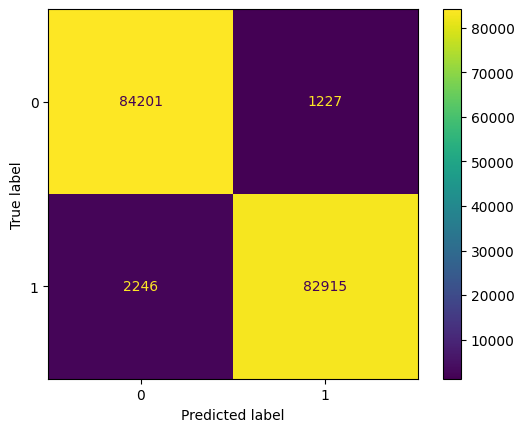

In [ ]:
print (ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred_os))

###**undersampling**

In [ ]:
us=RandomUnderSampler ()
X_us,y_us=us.fit_resample(X,y)

In [ ]:
y_us.value_counts()

0    492
1    492
Name: Class, dtype: int64

Text(0.5, 1.0, 'CLASS DISTRIBUTION WITH UNDERSAMPLING \n (0: No Fraud || 1: Fraud)')

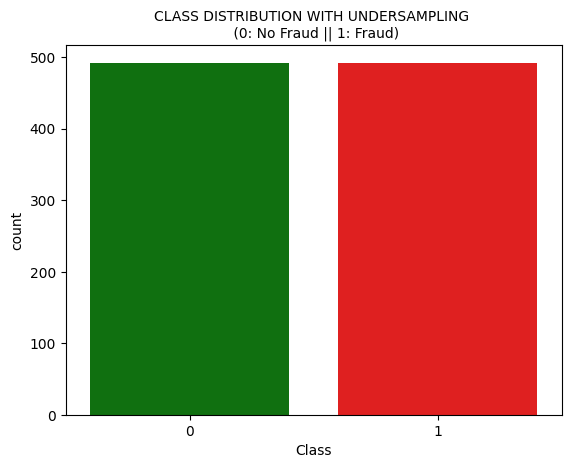

In [ ]:
color=['g','r']
sns.countplot(x=y_us,data=df,palette=color)
plt.title('CLASS DISTRIBUTION WITH UNDERSAMPLING \n (0: No Fraud || 1: Fraud)',fontsize=10)

In [ ]:
X_us

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,30074.0,-1.542920,-0.012647,1.304303,0.998211,0.094912,-0.416271,-0.131120,0.611944,-0.375677,...,0.216109,0.058950,-0.208890,-0.121592,0.103162,0.277564,0.574839,-0.082951,-0.136728,55.00
1,104961.0,-0.926649,1.811247,1.047280,0.472509,-0.369324,-0.429768,-0.796277,-4.381794,0.895850,...,-0.738146,3.362698,-2.299212,0.133479,0.871059,1.344556,0.541878,0.140929,0.169766,5.38
2,124849.0,0.854087,1.212528,-0.050894,4.399249,0.978576,0.535786,0.726137,-0.268670,-1.585535,...,0.076513,0.312776,1.109139,0.136994,0.596811,-1.156515,0.318558,-0.138195,-0.149235,14.38
3,65413.0,1.235333,0.176726,0.153043,0.514994,-0.295979,-0.595815,-0.133115,0.056752,0.041248,...,-0.162378,-0.276387,-0.911870,0.094935,-0.086882,0.175594,0.103071,-0.037968,0.013810,1.98
4,50723.0,1.107599,0.246093,0.869416,0.985808,-0.340976,-0.064010,-0.190474,0.112592,-0.226250,...,-0.096317,-0.087351,-0.218924,0.141907,0.199574,0.198807,-0.626534,0.055689,0.025400,6.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [ ]:
X_scaled_us=scaler.fit_transform(X_us)
X_scaled_us

array([[0.17257165, 0.8817618 , 0.37024318, ..., 0.69606846, 0.43331131,
        0.01876685],
       [0.60817139, 0.90049377, 0.42228623, ..., 0.71777107, 0.48461329,
        0.00183574],
       [0.72385512, 0.95462042, 0.40520238, ..., 0.69071328, 0.43121782,
        0.00490668],
       ...,
       [0.98271259, 0.90810806, 0.40274383, ..., 0.74144129, 0.48873015,
        0.02657727],
       [0.9862899 , 0.83401289, 0.38732113, ..., 0.78988796, 0.41373211,
        0.08359778],
       [0.9885119 , 0.98920731, 0.37512602, ..., 0.70439924, 0.45363486,
        0.01451189]])

In [ ]:
X_train_us,X_test_us,y_train_us,y_test_us=train_test_split(X_scaled_us,y_us,test_size=0.3,random_state=1)

In [ ]:
print (X_train_us.shape,y_train_us.shape)
print (X_test_us.shape,y_test_us.shape)

(688, 30) (688,)
(296, 30) (296,)


In [ ]:
knn_us=KNeighborsClassifier ()
sv_us=SVC()
gnb_us=GaussianNB ()
dec_us=DecisionTreeClassifier (criterion='entropy')
rfc_us=RandomForestClassifier ()
adc_us=AdaBoostClassifier ()
models=[knn_us,sv_us,gnb_us,dec_us,rfc_us,adc_us]
for model in models:
    print ('******************************',model,'******************************')
    model.fit(X_train_us,y_train_us)
    y_pred_us=model.predict(X_test_us)
    y_new=model.predict(scaler.transform([[0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000]]))
    print ('predicted value:',y_new)
    print (classification_report(y_test_us,y_pred_us))

****************************** KNeighborsClassifier() ******************************
predicted value: [0]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       142
           1       0.96      0.85      0.90       154

    accuracy                           0.91       296
   macro avg       0.91      0.91      0.91       296
weighted avg       0.91      0.91      0.91       296

****************************** SVC() ******************************
predicted value: [0]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       142
           1       1.00      0.87      0.93       154

    accuracy                           0.93       296
   macro avg       0.94      0.94      0.93       296
weighted avg       0.94      0.93      0.93       296

****************************** GaussianNB() ******************************
predicted value: [0]
              precision    recall  f1-score   support



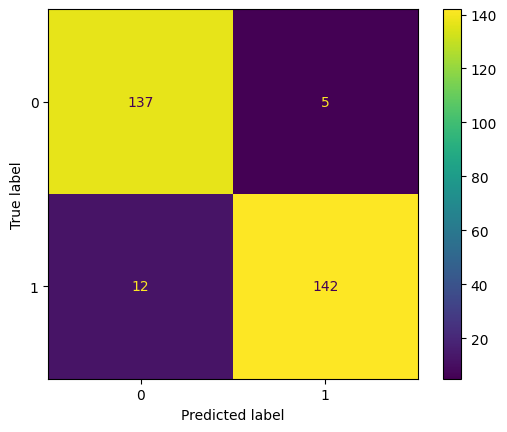

In [ ]:
print (ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_us))

**CONCLUSION**

Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels (more no fraud than fraud transactions).  Also, in our undersample data our model is unable to detect for a large number of cases non fraud transactions correctly and instead, misclassifies those non fraud transactions as fraud cases. Imagine that people that were making regular purchases got their card blocked due to the reason that our model classified that transaction as a fraud transaction, this will be a huge disadvantage for the financial institution. The number of customer complaints and customer disatisfaction will increase. The next step of this analysis will be to find and do an outlier removal on our oversample and undersample dataset and see if our accuracy in the test set improves...